# IDEEN ZUR UMSETZUNG:
- Verkehrsaufkommen durch das Jahr herausfinden (Wochentage, Feriengänger etc.)
- Grösse der Steine vs. Maschengrösse Netz
- Korrelation zwischen Temperatur und Anzahl Steinschläge (Frost, Tauwetter)
- Kamera mit Erkennung von Steinen installieren zur Vorhersage

In [268]:
#convert and save notebook to html
# !jupyter nbconvert --to html Notebook.ipynb --output "html_notebook"

## Aufgabenstellung

Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.0001 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.


### Grundlagen

Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt das Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000 kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetzen werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 1200 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h

***

## Setup / Datenbereinigung

In [269]:
#prepration of workspace
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
#import df
df_zone1 = pd.read_csv("https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=1")
df_zone2 = pd.read_csv("https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=1")

#### Daten zu Ablösezone 1 bereinigen

In [271]:
#explore dataset
df_zone1

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
#rename columns
df_zone1 = df_zone1.rename(columns={"Datum": "date", "Uhrzeit": "time", "Masse [kg]": "mass [kg]", "Geschwindigkeit [m/s]": "vel [m/s]"})

In [273]:
#remove NaN values
df_zone1 = pd.DataFrame(df_zone1)
df_zone1.drop(df_zone1.iloc[:, 4:77],axis = 1, inplace = True )
df_zone1 = df_zone1.iloc[0:68]
display(df_zone1)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18,16:00,167.0,8.9
64,2019-03-22,18:00,2847.0,7.0
65,2019-03-26,00:00,44.0,8.9
66,2019-03-26,06:00,45.0,8.4


In [274]:
#check datatypes
df_zone1.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [275]:
#change datatype of column "date"

#connect column date and time
df_zone1["date"] = pd.to_datetime(df_zone1["date"] + " " + df_zone1["time"])

#rearrange columns
df_zone1 = df_zone1[["date", "mass [kg]", "vel [m/s]"]]

In [276]:
#check datatypes
df_zone1.dtypes

date         datetime64[ns]
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [277]:
#sort df by date
df_zone1.sort_values(by = "date", inplace = True)

In [278]:
display(df_zone1)

,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,194.0,8.4
1,2019-01-01 21:00:00,224.0,8.8
2,2019-01-02 14:00:00,3104.0,9.2
3,2019-01-04 15:00:00,228.0,8.0
4,2019-01-05 23:00:00,755.0,7.0
...,...,...,...
63,2019-03-18 16:00:00,167.0,8.9
64,2019-03-22 18:00:00,2847.0,7.0
65,2019-03-26 00:00:00,44.0,8.9
66,2019-03-26 06:00:00,45.0,8.4


#### Daten zu Ablösezone 2 bereinigen

In [279]:
#explore dataset
df_zone2

,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-11,16:00,58.0,33.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-01-14,11:00,365.0,40.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-01-16,02:00,22.0,46.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-01-18,06:00,146.0,36.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-01-19,17:00,29.0,38.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
#rename columns
df_zone2 = df_zone2.rename(columns={"Date": "date", "Uhrzeit": "time", "m [kg]": "mass [kg]", "v [m/s]": "vel [m/s]"})

In [281]:
#remove NaN values
df_zone2 = pd.DataFrame(df_zone2)
df_zone2.drop(df_zone2.iloc[:, 4:77],axis = 1, inplace = True )
df_zone2 = df_zone2.iloc[0:68]
display(df_zone2)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6
5,2019-01-11,16:00,58.0,33.2
6,2019-01-14,11:00,365.0,40.2
7,2019-01-16,02:00,22.0,46.5
8,2019-01-18,06:00,146.0,36.2
9,2019-01-19,17:00,29.0,38.3


In [282]:
#check datatypes
df_zone2.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [283]:
#change datatype of column "date"

#connect column date and time
df_zone2["date"] = pd.to_datetime(df_zone2["date"] + " " + df_zone2["time"])

#rearrange columns
df_zone2 = df_zone2[["date", "mass [kg]", "vel [m/s]"]]

In [284]:
#check datatypes
df_zone2.dtypes

date         datetime64[ns]
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [285]:
#sort df by date
df_zone2.sort_values(by = "date", inplace = True)

In [286]:
display(df_zone2)

,date,mass [kg],vel [m/s]
0,2019-01-01 09:00:00,38.0,45.4
1,2019-01-03 06:00:00,187.0,41.6
2,2019-01-04 10:00:00,36.0,44.6
3,2019-01-07 14:00:00,6.0,41.2
4,2019-01-11 06:00:00,65.0,39.6
5,2019-01-11 16:00:00,58.0,33.2
6,2019-01-14 11:00:00,365.0,40.2
7,2019-01-16 02:00:00,22.0,46.5
8,2019-01-18 06:00:00,146.0,36.2
9,2019-01-19 17:00:00,29.0,38.3


## Analyse der Daten

In [287]:
#overview of dataframe df_zone1 and df_zone2
df_zone1.describe()

,mass [kg],vel [m/s]
count,68.000000,68.000000
mean,628.632353,8.788235
std,695.884703,1.989189
min,12.000000,3.600000
25%,214.750000,7.300000
50%,402.500000,8.800000
75%,773.000000,10.125000
max,3104.000000,14.100000


In [288]:
df_zone2.describe()

,mass [kg],vel [m/s]
count,32.000000,32.000000
mean,99.250000,37.790625
std,104.072555,5.395778
min,0.000000,24.900000
25%,36.750000,33.200000
50%,58.000000,38.750000
75%,140.000000,41.725000
max,406.000000,46.500000


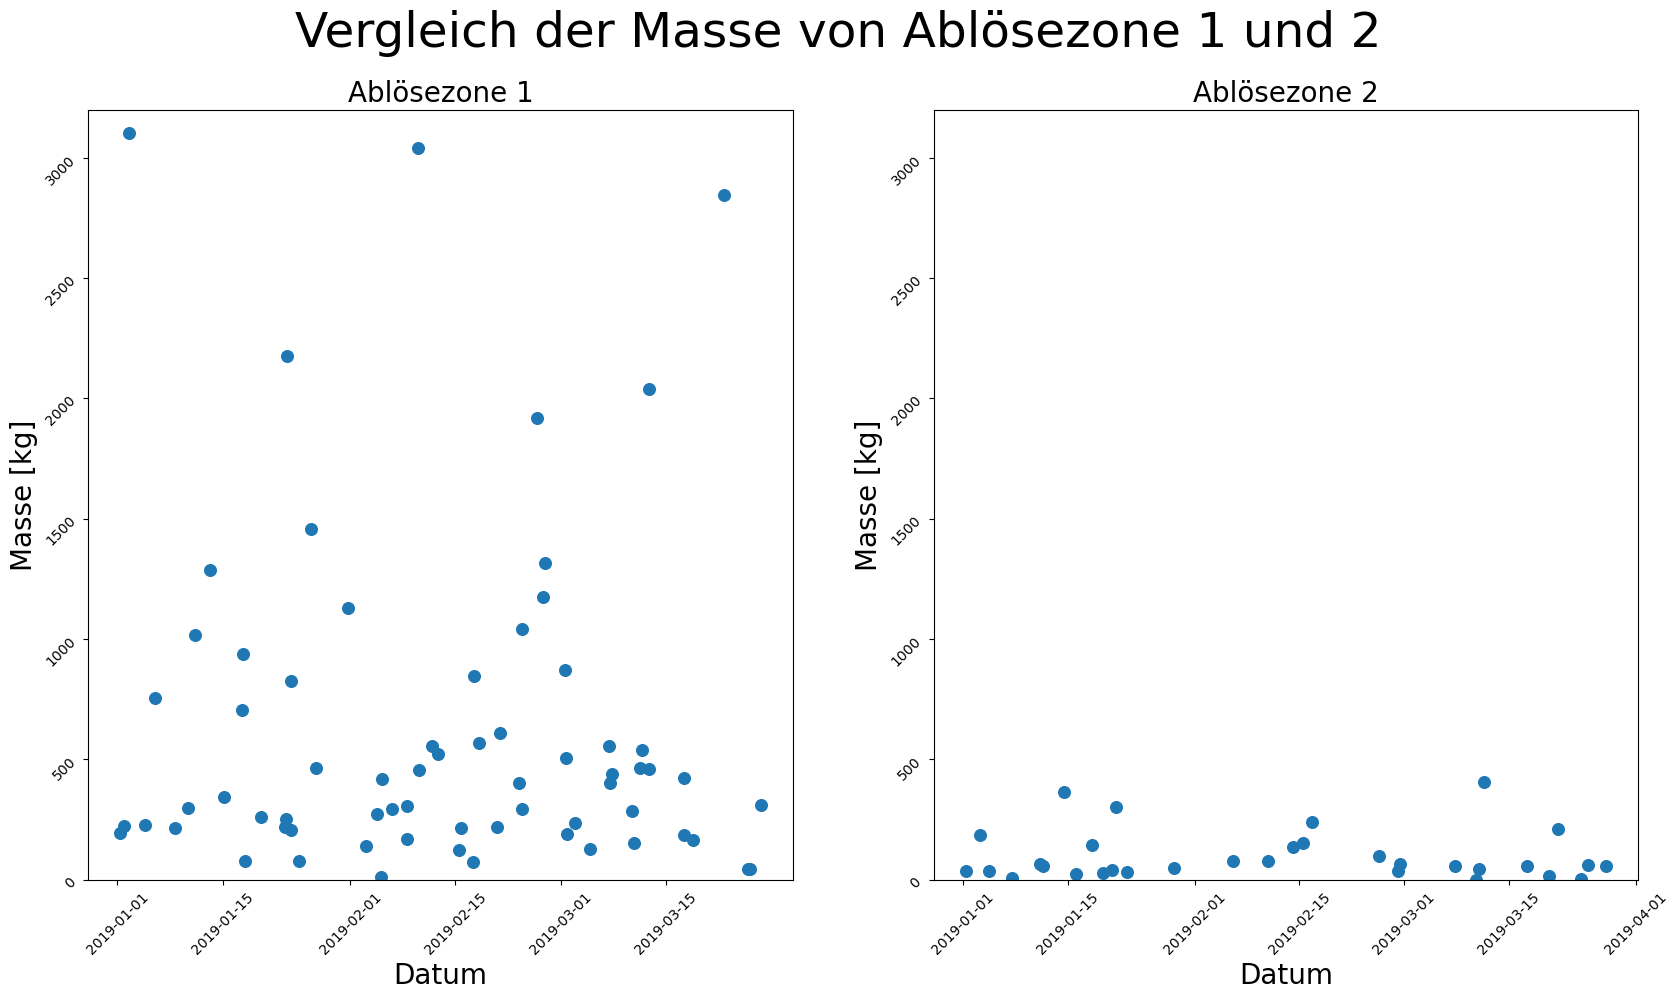

In [289]:
#compare mass of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["mass [kg]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Masse [kg]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=3200)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["mass [kg]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Masse [kg]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=3200)

#overall title
plt.suptitle("Vergleich der Masse von Ablösezone 1 und 2", fontsize = 35)

#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Eine Gegenüberstellung der beiden Ablösezonen zeigt, dass Steinschläge in Zone 1 häufiger vorkommen als in Zone 2. Weiter wird ersichtlich, dass sich im Zone 1 Steine mit grösserer Masse ablösen.

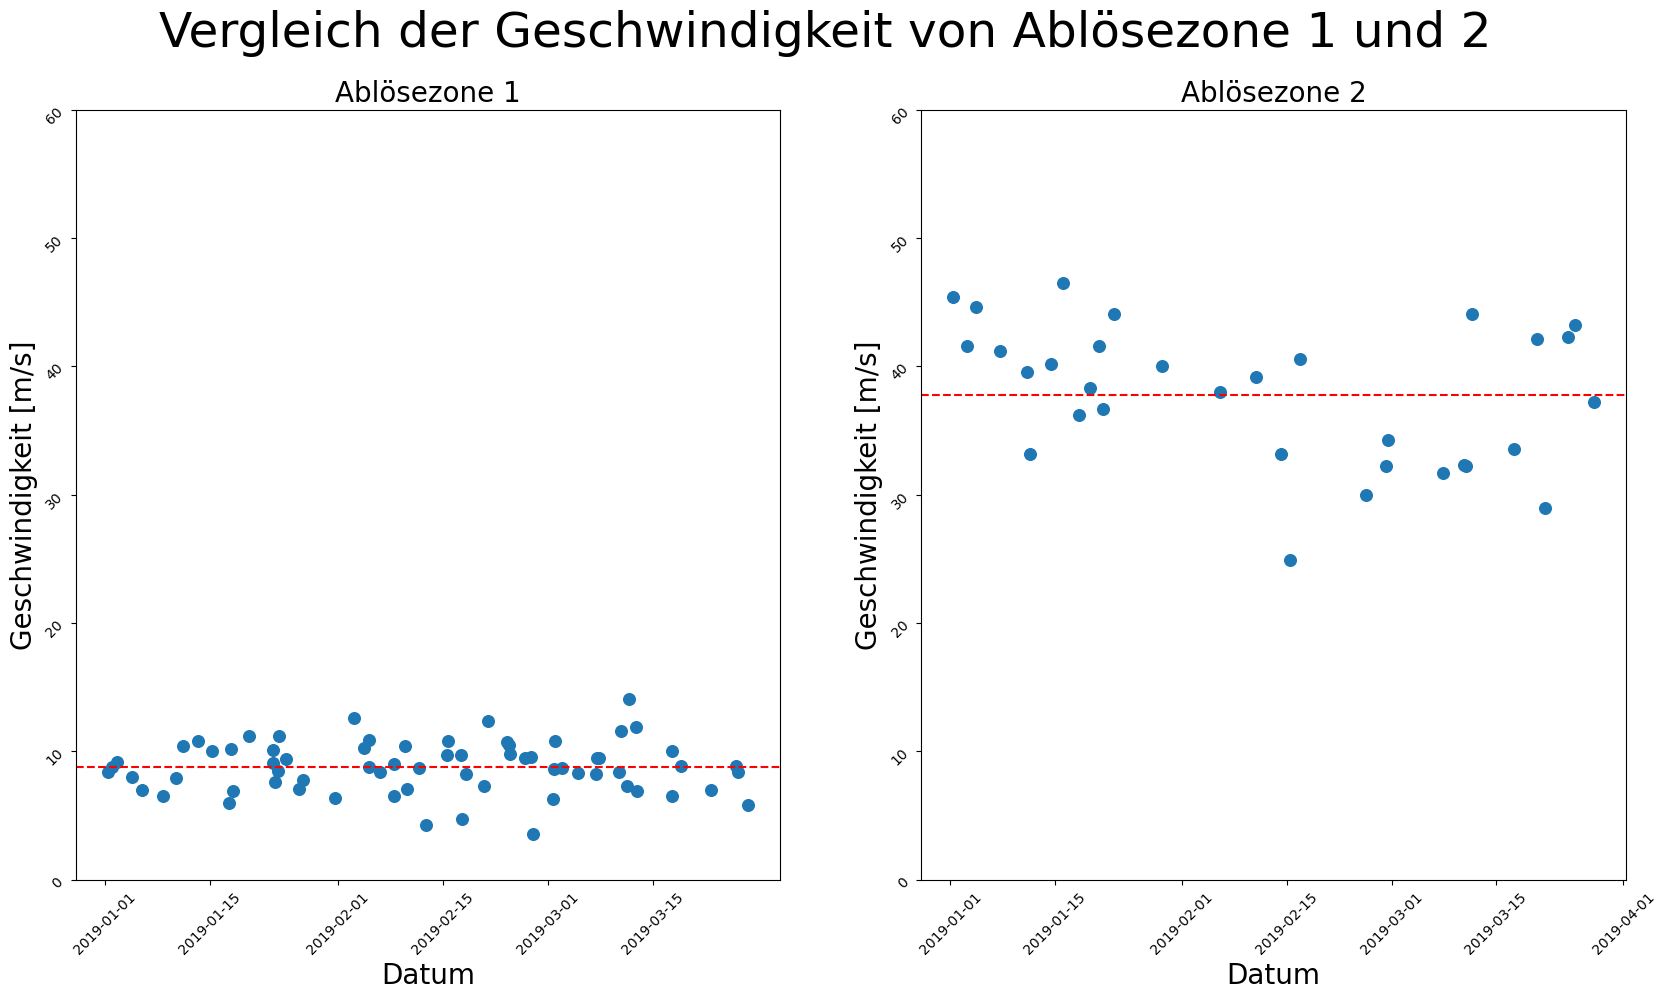

In [290]:
#compare velocity of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["vel [m/s]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=60)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["vel [m/s]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=60)

#overall title
plt.suptitle("Vergleich der Geschwindigkeit von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["vel [m/s]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["vel [m/s]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')

#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Steine welche sich aus Zone 1 ablösen, weisen eine geringere Geschwindigkeit auf, als jeden die sich aus Zone 2 ablösen.

In [291]:
# #compare time and count of the fallen rocks
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
#
# #subplot 1
# ax1.bar(df_zone1["date"], s = 70)
# ax1.set_xlabel("Datum", fontsize = 20)
# ax1.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
# ax1.set_title("Ablösezone 1", fontsize = 20)
# ax1.set_ylim(bottom=0, top=60)
#
# #subplot 1
# ax2.scatter(df_zone2["date"], s = 70)
# ax2.set_xlabel("Datum", fontsize = 20)
# ax2.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
# ax2.set_title("Ablösezone 2", fontsize = 20)
# ax2.set_ylim(bottom=0, top=60)
#
# #overall title
# plt.suptitle("Vergleich der Geschwindigkeit von Ablösezone 1 und 2", fontsize = 35)
#
# #change angle of labels
# for ax in fig.axes:
#     ax.tick_params(labelrotation = 45)
#
# plt.show()

In [292]:
# #show mass and velocity over time
# fig, (ax1) = plt.subplots(1, figsize=(20, 10))
#
# ax1.scatter(x = df_zones["date"], y = df_zones["vel [m/s]"], s = df_zones["mass [kg]"])
# ax1.set_xlabel("Date", fontsize = 25)
# ax1.set_ylabel("Velocity [m/s]", fontsize = 25)
# plt.suptitle("Mass and Velocity of fallen Rocks over Time", fontsize = 35)
# plt.title("Size of dots represents Mass of the Stones", fontsize = 25)
#
# for ax in fig.axes:
#     ax.tick_params(labelrotation = 45)
#
# plt.show();